In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np
from sklearn.datasets import make_blobs
import umap.umap_ as umap
from seirsplus.models import *
from seirsplus.networks import *
import statistics
import seir
from seir_experiments import * 
import statistics

/home/u72216/.local/lib/python3.7/site-packages/numba/core/cpu.py:78: UserWarning: Numba extension module 'sdc' failed to load due to 'VersionConflict((numba 0.53.1 (/home/u72216/.local/lib/python3.7/site-packages), Requirement.parse('numba<0.53,>=0.52.0')))'.
  numba.core.entrypoints.init_all()
/home/u72216/.local/lib/python3.7/site-packages/numba/core/cpu.py:78: UserWarning: Numba extension module 'numba_dppy.numpy_usm_shared' failed to load due to 'ImportError(cannot import name 'allocator' from 'numba.core.pythonapi' (/home/u72216/.local/lib/python3.7/site-packages/numba/core/pythonapi.py))'.
  numba.core.entrypoints.init_all()


In [2]:
def ipfnB(G1,s=10000,e=1,i=1):
#s = no of points
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002
    
    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05
    
    E=s*e/100
    I=s*i/100
    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = E, initI = I)
    
    model_base.run(T=300)
    fig,axs = model_base.figure_basic()
    
    line = axs.lines[1]
    p = line.get_data()
    p0 = p[0].compressed()
    p1 = p[1].compressed()
    #Maximum
    m = max(p[1])
    #Days Max
    ind= numpy.argmax(p[1])
    d = p[0][numpy.argmax(p[1])]
    #Mean and St Deviation
    mean  = statistics.mean(p1)
    stdev =  statistics.stdev(p1)
    line1 = axs.lines[2]
    w = line1.get_data()
    #Total Infections
    tot = 1 -(w[1][w[1].shape[0]-1])
    tp = 0.1*m
    np = 0.9*m
    #Ten Percent
    tpl =[]
    for i in range(len(p1)):
        x = numpy.abs(p1[i]-tp)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            tpl.append(p0[i])
    tplval = statistics.mean(tpl)
    
    #Ninety Percent
    nplfh =[]
    nplsh = []
    for i in range(ind):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplfh.append(p0[i])
    for i in range(ind, len(p1)):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplsh.append(p0[i])
    npl=[(statistics.mean(nplfh)),(statistics.mean(nplsh))]
    
    
    return [m,d,tot,tplval,npl, mean, stdev],p

In [3]:
def calc_euclid(x,y):
    dist = sum((x-y)**2)

    return dist

In [4]:
def plot_degree_dist(min_degree, mean_degree, gammas):
    
    N=10000
    fig, ax = plt.subplots()
    deg_list=[]
    for gamma in gammas:
        degs = generate_power_law_degrees(N, min_degree, mean_degree, gamma)
        # Degree histogram
        ax = sns.distplot(degs, kde=False, label=gamma, ax=ax)
        # hist_kws={'alpha':0.2}, bins=np.arange(0, 1200, 20),
        deg_list.append(degs)
    ax.set_yscale('log')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Number of nodes')
    ax.legend(title='gamma')
    ax.set_title(f'Degree distribution (log scale) for N={N} nodes, mean={mean_degree}')
    print(np.median(degs), np.sort(degs)[-int(0.001 * N)])  # (median, top 0.1%)
    return ax,deg_list

In [70]:
g1  = seir.generate_scale_free_graph(10000,min_degree=2,mean_degree=20,gamma=0.2)
g1 = nx.Graph(g1)

t = 0.00
t = 10.02
t = 20.01
t = 30.00
t = 40.00
t = 50.00
t = 60.01
t = 70.00
t = 80.01
t = 90.01
t = 100.00
t = 110.04
t = 120.02
t = 130.06
t = 140.01
t = 150.42
t = 160.27
t = 170.75
t = 190.11


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


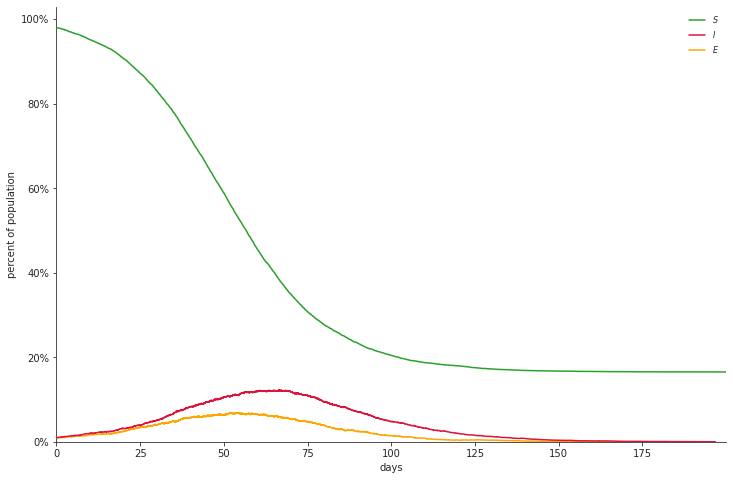

In [71]:
res1,line1 = ipfnB(g1,e=1,i=1)

In [12]:
g2 = nx.barabasi_albert_graph(10000,m=10)

t = 0.01
t = 10.02
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.01
t = 110.01
t = 120.02
t = 130.07
t = 140.09
t = 150.07
t = 160.77
t = 170.07
t = 180.41


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


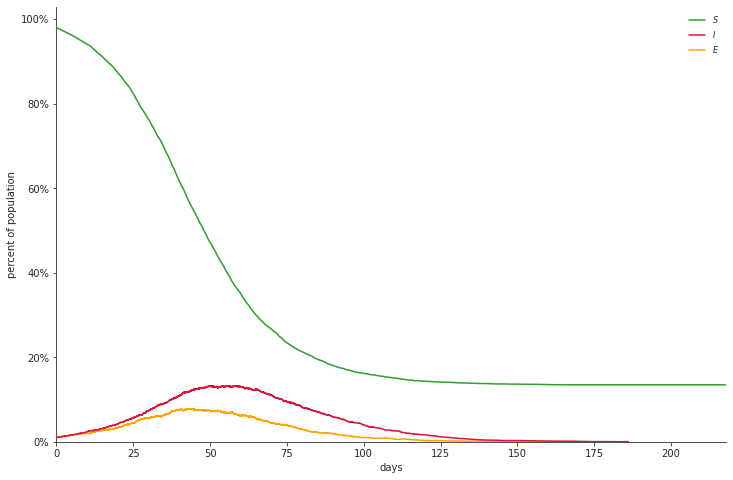

In [15]:
res2,line2 = ipfnB(g2,e=1,i=1)

In [74]:
#Sort Key
def mykey(x):
    return(x[0])

In [87]:
deg=g1.degree()

In [92]:
deg[7]

3

In [76]:
s = 10000
data1,y1 = make_blobs(n_samples=s,n_features=2,cluster_std=3)

In [93]:
g3=nx.Graph()
g3.add_nodes_from(range(10000))
for i in range(len(data1)):
    dlist=[]
    for j in range(len(data1)):
        diff = calc_euclid(data1[i],data1[j])
        dlist.append([diff,j])
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    for k in range(deg[i]):
        edgelist.append((i,dlist[k+1][1]))
    g3.add_edges_from(edgelist)
    if(i%100==0): print(i)



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


t = 0.05
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.00
t = 90.00
t = 100.00
t = 110.01
t = 120.00
t = 130.02
t = 140.02
t = 150.00
t = 160.01
t = 170.00
t = 180.05
t = 190.09
t = 200.09
t = 220.03
t = 230.61


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


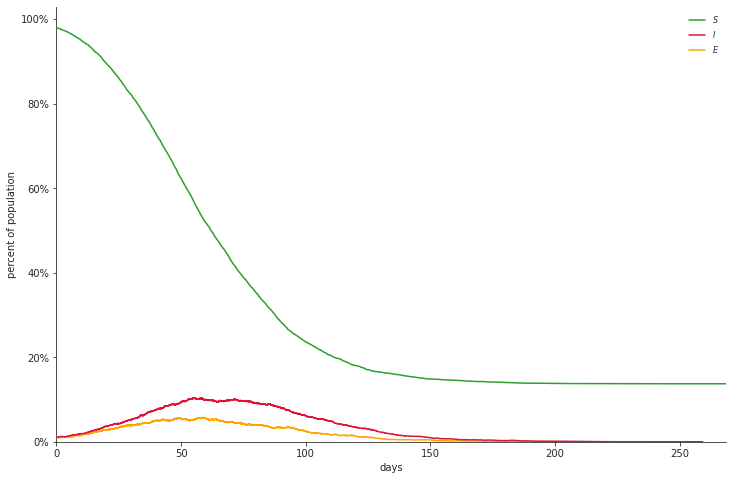

In [95]:
res3,line3 = ipfnB(g3,e=1,i=1)


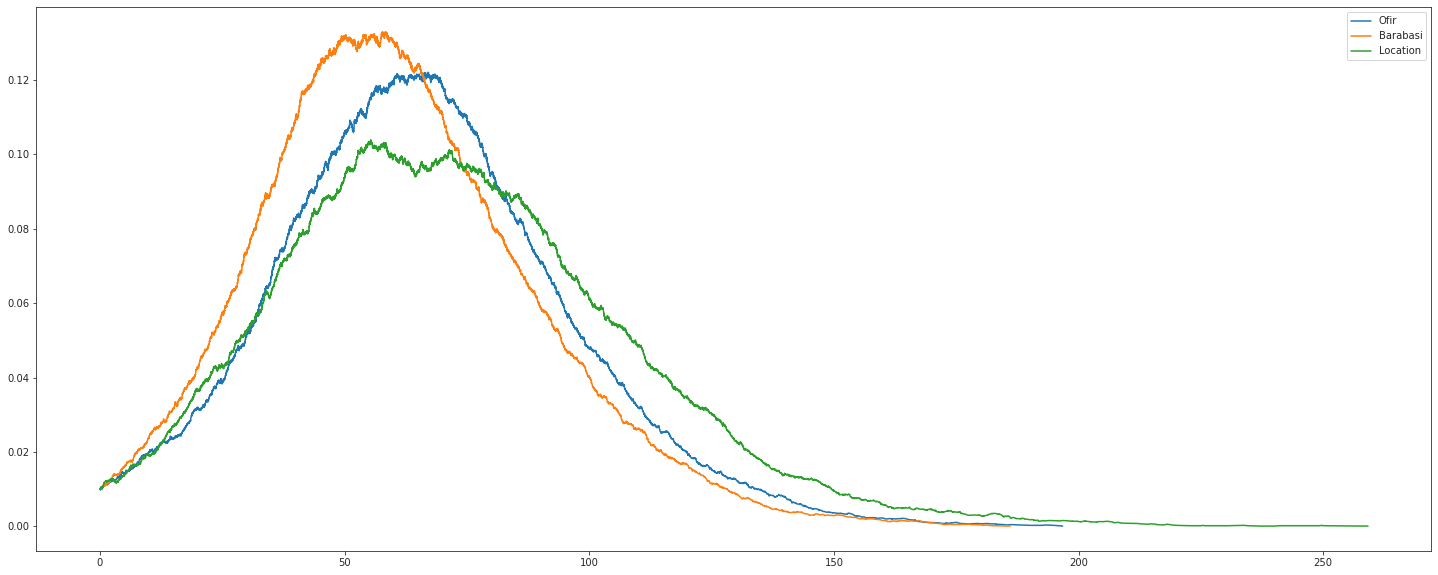

In [96]:
x1 = line1[0].compressed()
y1 = line1[1].compressed()
plt.plot(x1, y1, label = "Ofir")

x2 = line2[0].compressed()
y2 = line2[1].compressed()
plt.plot(x2, y2, label = "Barabasi")

x3 = line3[0].compressed()
y3 = line3[1].compressed()
plt.plot(x3, y3, label = "Location")

plt.legend()
plt.show()

In [102]:
d = np.asarray(g1.degree)
m= []
for x in d:
    m.append(x[1])
print(np.argmax(m))

5343


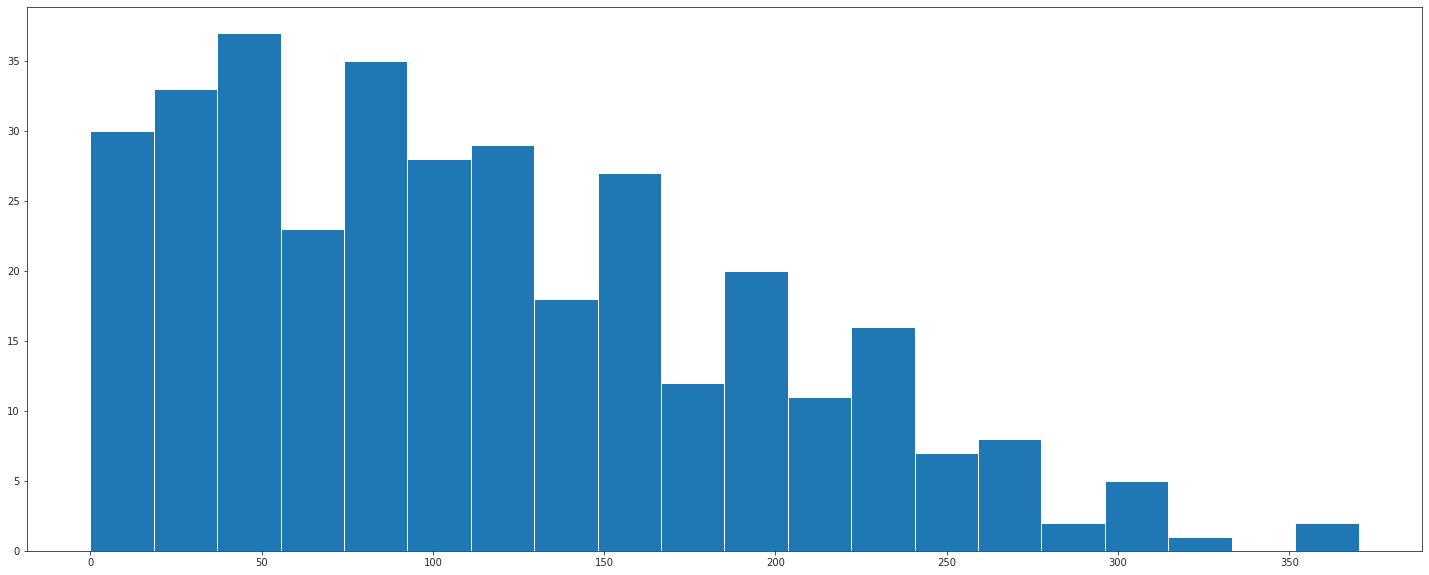

In [98]:
dlist1=[]
for u,v in g1.edges(5343):
    diff= calc_euclid(data1[u],data1[v])
    dlist1.append(diff)   

hist2 = plt.hist(dlist1,bins=20)

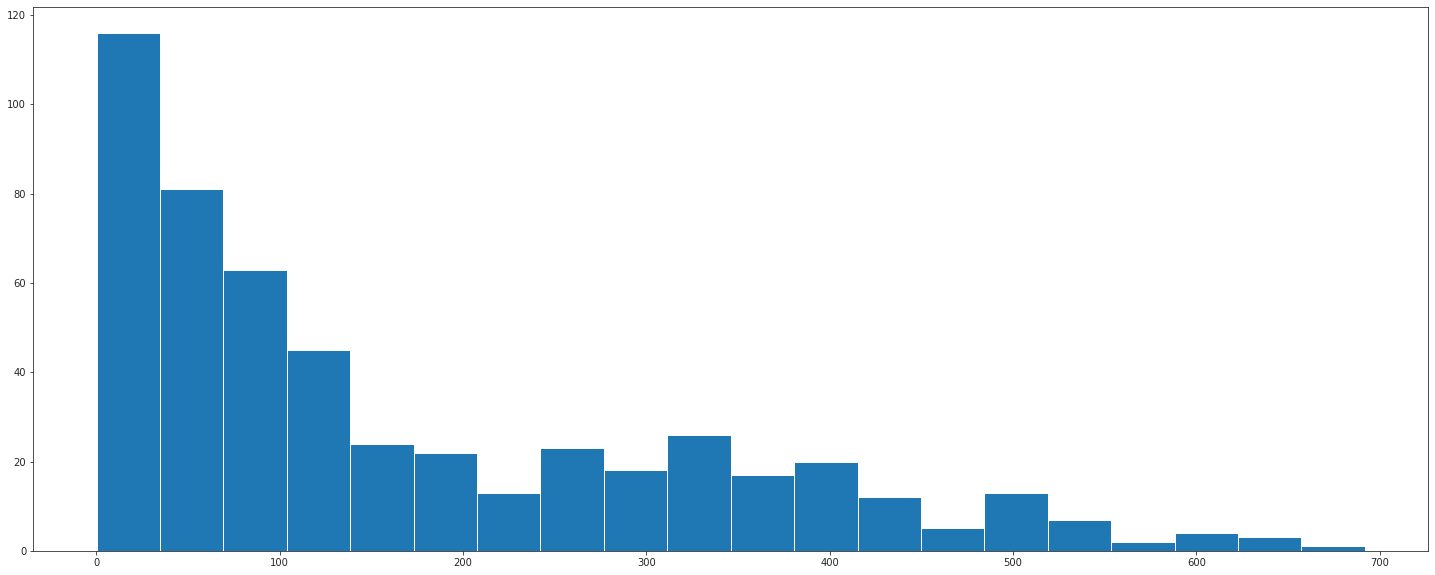

In [100]:
dlist2=[]
for u,v in g2.edges(13):
    diff= calc_euclid(data1[u],data1[v])
    dlist2.append(diff)   

hist2 = plt.hist(dlist2,bins=20)

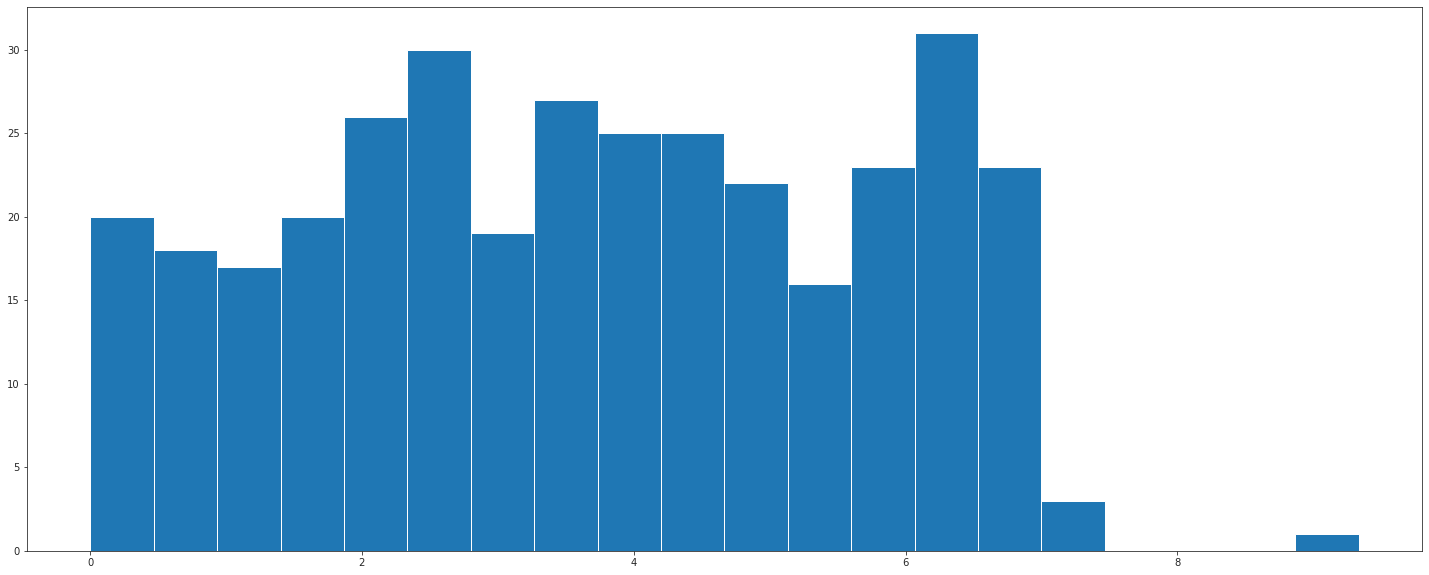

In [103]:
dlist3=[]
for u,v in g3.edges(5343):
    diff= calc_euclid(data1[u],data1[v])
    dlist3.append(diff)   

hist2 = plt.hist(dlist3,bins=20)

In [106]:
dlist_tot =[dlist2,dlist1,dlist3]

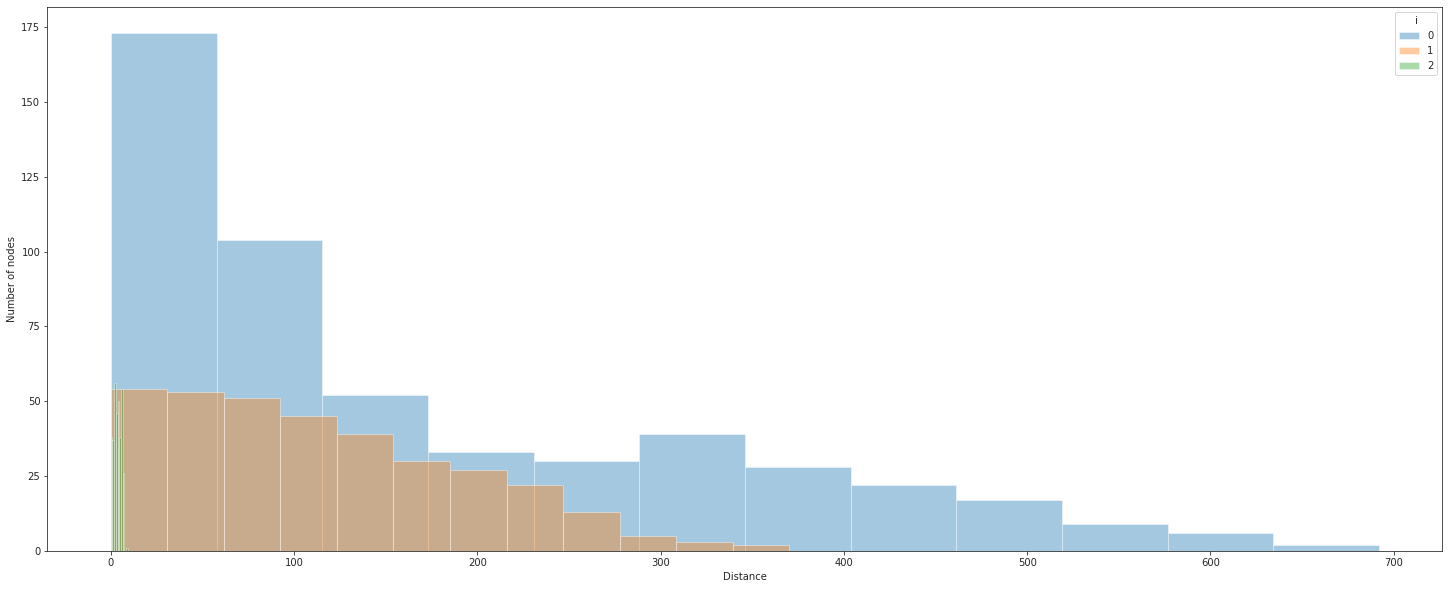

In [107]:
fig, ax = plt.subplots()

for i in range(len(dlist_tot)):
    ax = sns.distplot(dlist_tot[i], kde=False, label=i, ax=ax)
ax.set_xlabel('Distance')
ax.set_ylabel('Number of nodes')
ax.legend(title='i')
